In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from numpy.random import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import random

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df=pd.read_csv("/content/drive/MyDrive/prosperLoanData (1).csv")

In [42]:
# Display the first few rows of the dataset
df.head()


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [43]:
# Get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [44]:
# Summary statistics of numerical columns
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [45]:
mode=df["CreditGrade"].mode().values[0]
df["CreditGrade"]=df["CreditGrade"].replace(np.nan,mode)

In [46]:
# Unique values in categorical columns
categoricalcolumns = ['CreditGrade', 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus']
for column in categoricalcolumns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in CreditGrade: ['C' 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Unique values in LoanStatus: ['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
Unique values in BorrowerState: ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'MO'
 'NE' 'UT' 'DC' 'MA' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'MT'
 'HI' 'NH' 'VT' 'WY' 'ME' 'AK' 'IA' 'SD' 'ND']
Unique values in Occupation: ['Other' 'Professional' 'Skilled Labor' 'Executive' 'Sales - Retail'
 'Laborer' 'Food Service' 'Fireman' 'Waiter/Waitress' 'Construction'
 'Computer Programmer' 'Sales - Commission' 'Retail Management'
 'Engineer - Mechanical' 'Military Enlisted' 'Clerical' nan 'Teacher'
 'Clergy' 'Accountant/CPA' 'Attorney' 'Nurse (RN)' 'Analyst'
 "Nurse's Aide

In [47]:
# Distribution of loan statuses
loan_status_counts = df['LoanStatus'].value_counts()
print("Loan Status Distribution:")
loan_status_counts

Loan Status Distribution:


Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [48]:
df.columns


Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [49]:
df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 81, dtype: int64

In [50]:
# Drop columns with high percentage of missing values

threshold = 0.7  # Set the threshold for dropping columns

df.dropna(thresh=threshold*len(df), axis=1, inplace=True)

In [51]:
# Drop rows with missing values in specific columns

columns_to_drop_na = ["EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn"]

df.dropna(subset=columns_to_drop_na, inplace=True)

In [52]:
# Fill missing values with appropriate methods

df["ProsperRating (numeric)"].fillna(df["ProsperRating (numeric)"].median(), inplace=True)

Preprocessing
Handling outliers

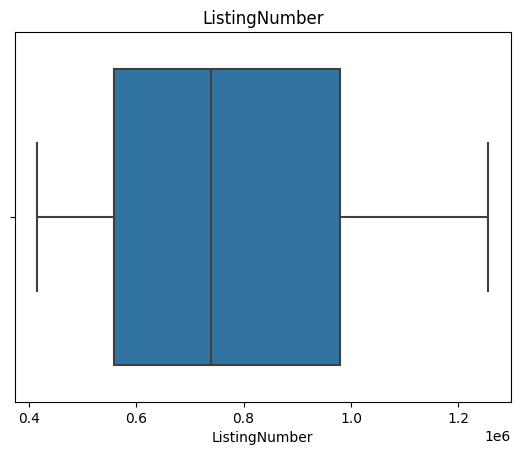

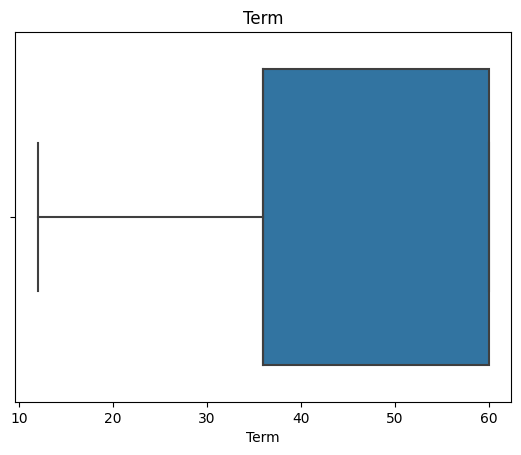

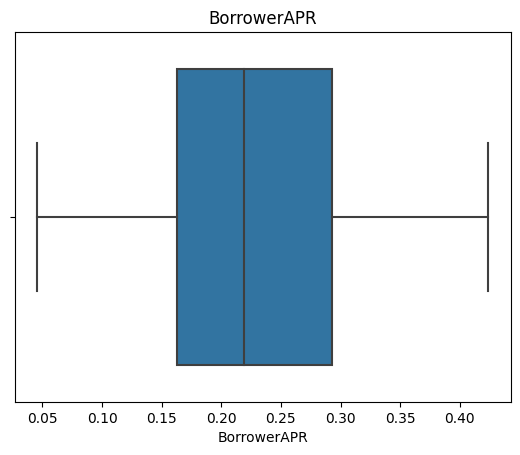

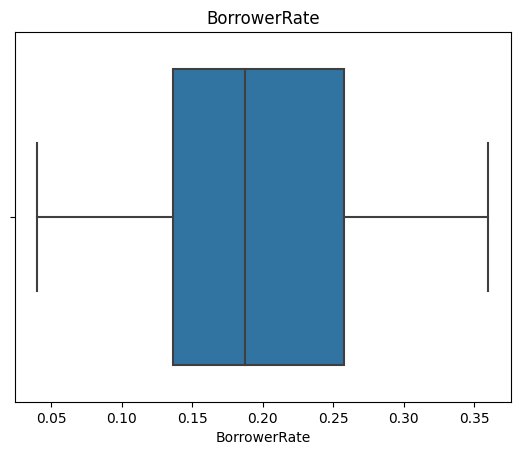

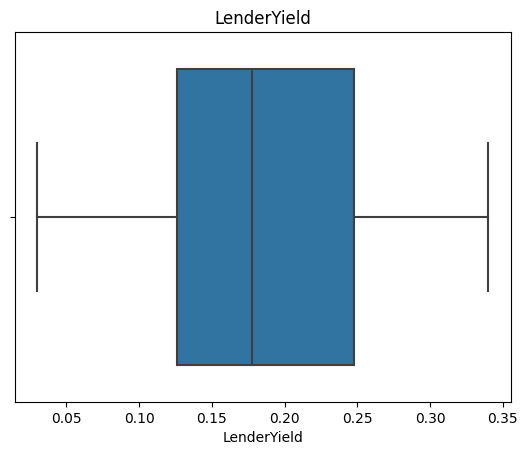

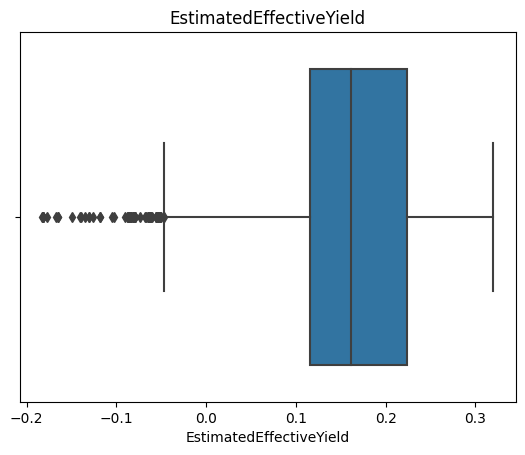

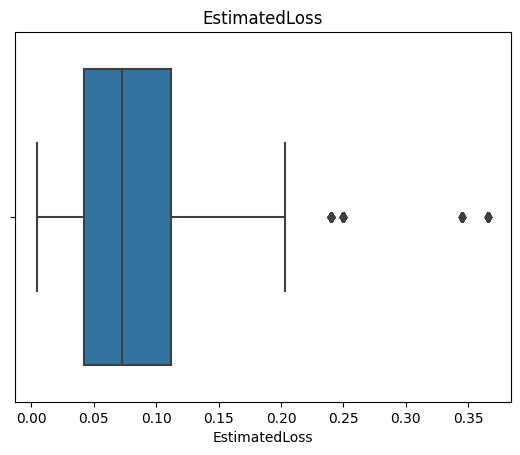

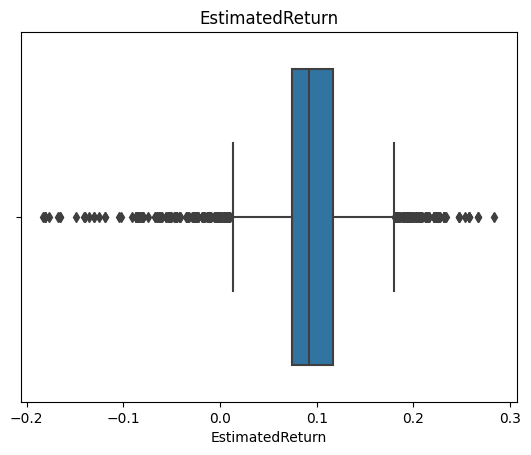

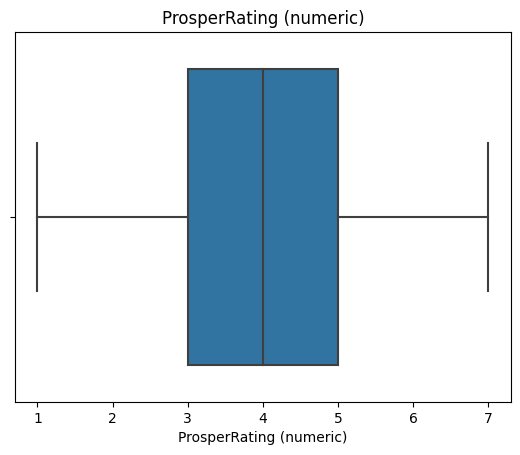

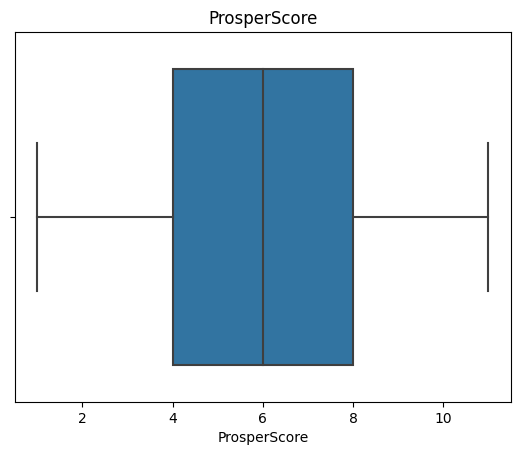

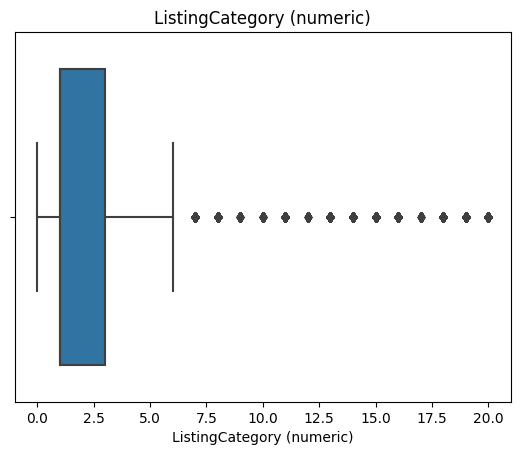

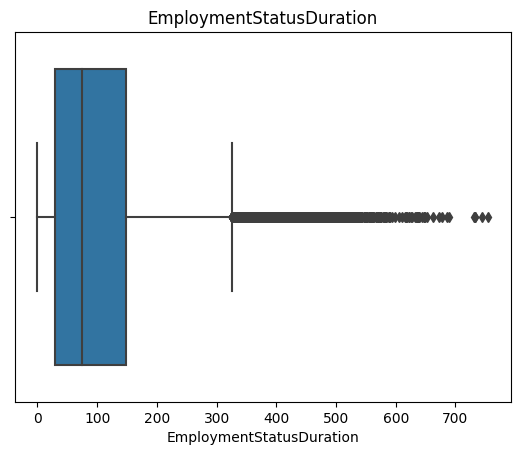

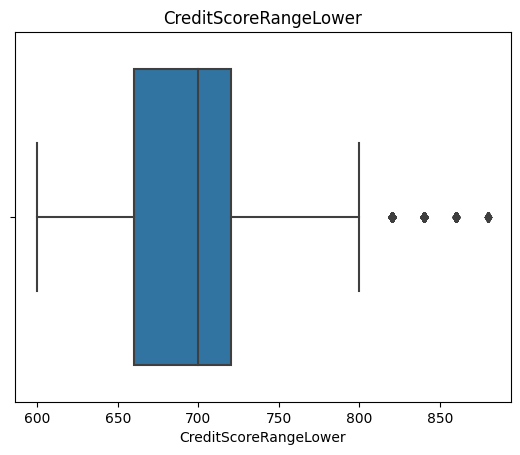

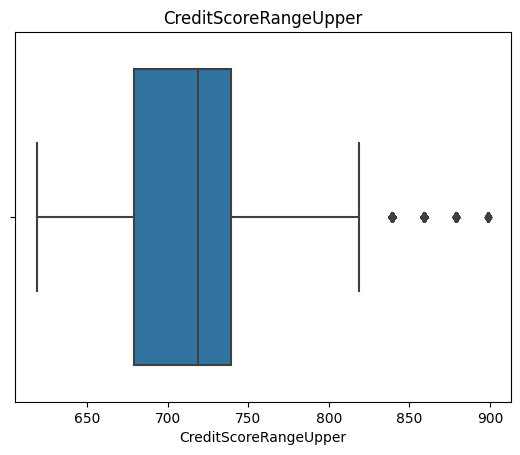

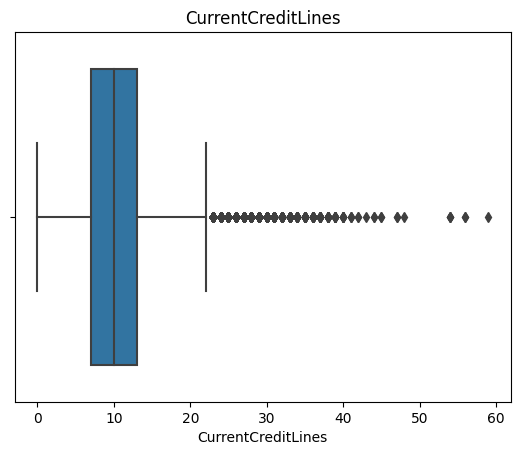

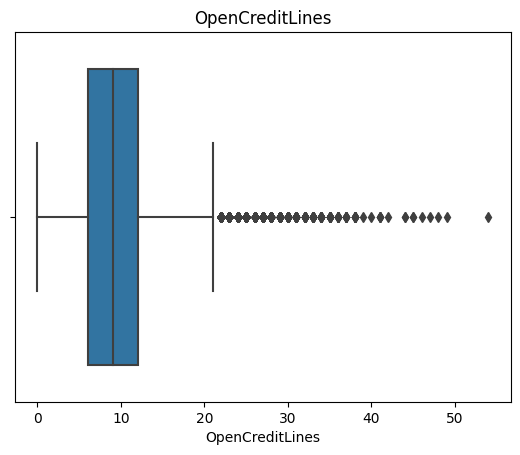

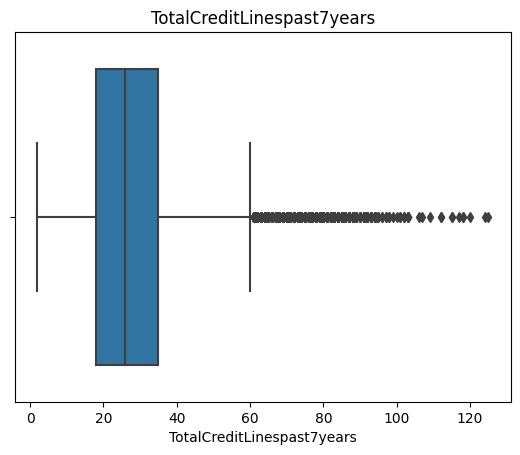

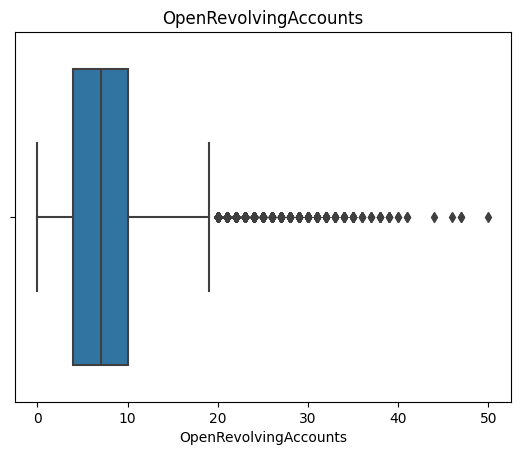

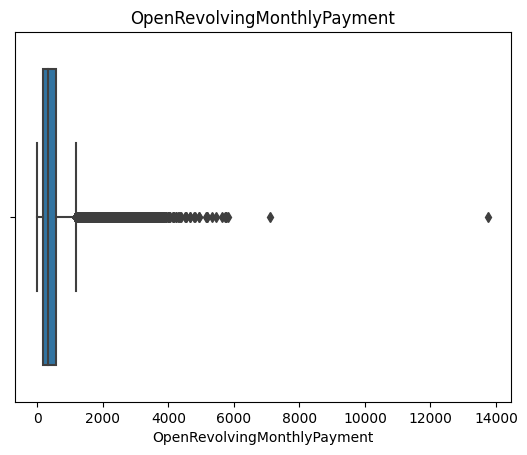

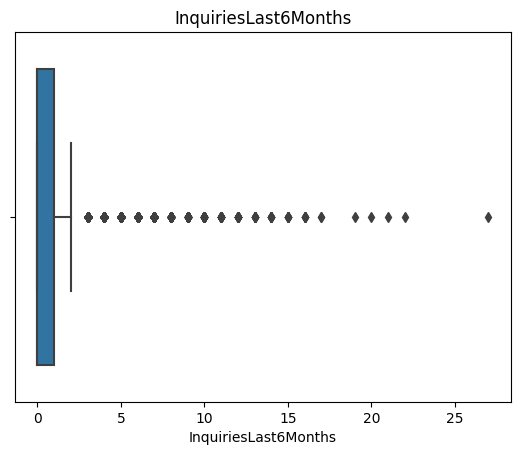

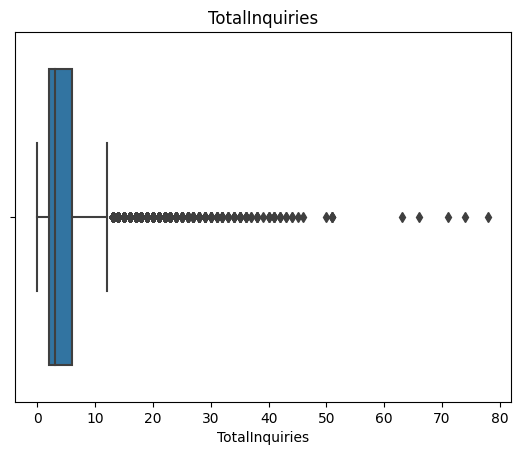

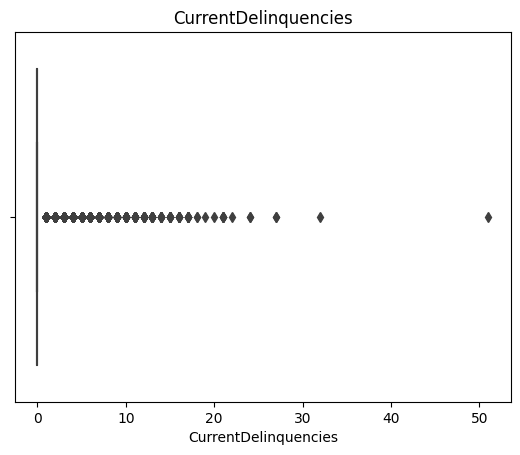

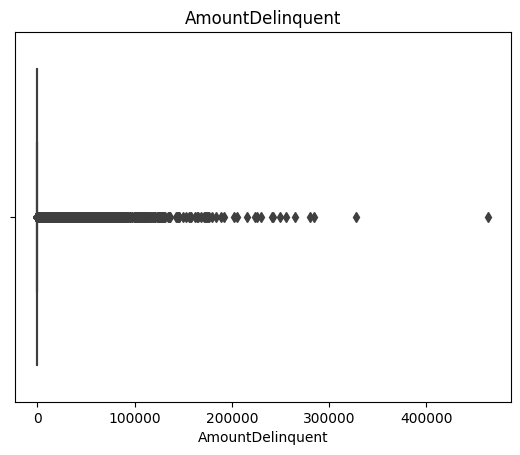

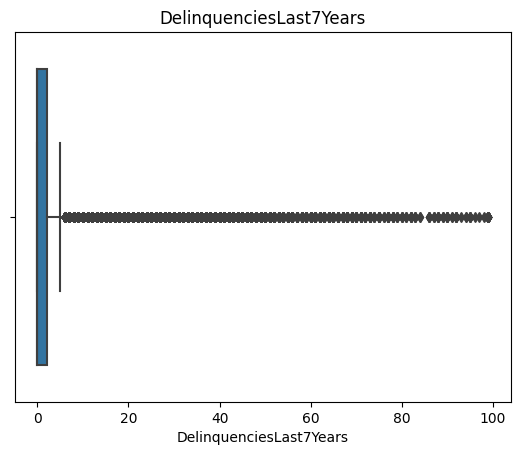

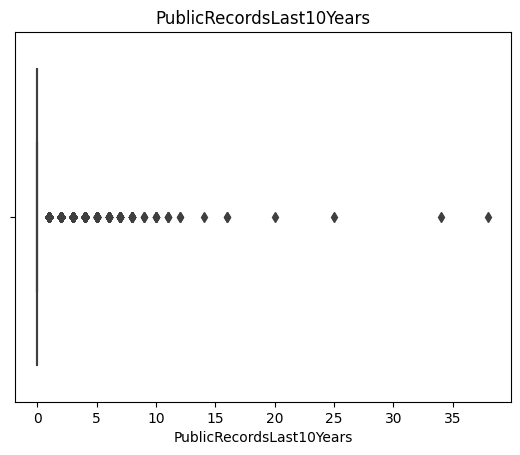

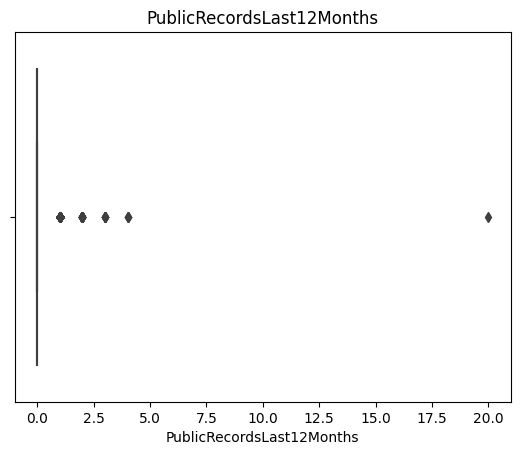

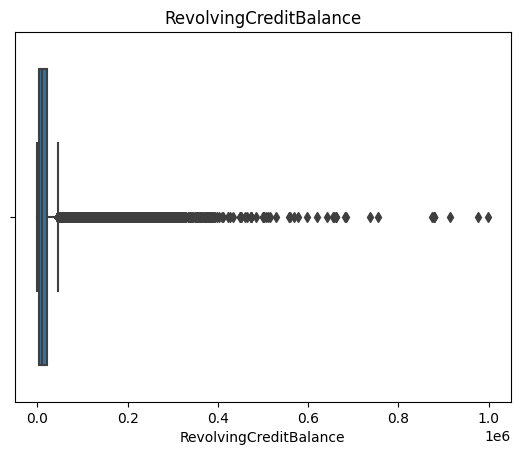

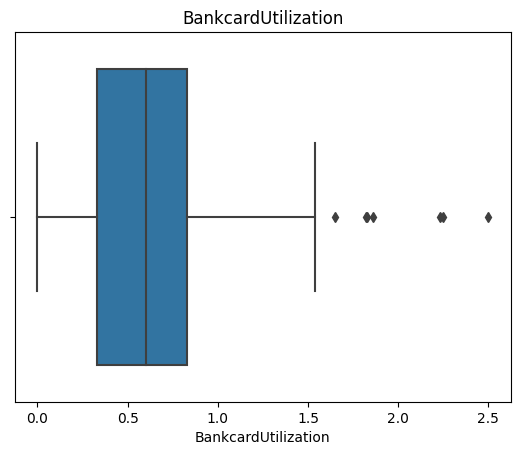

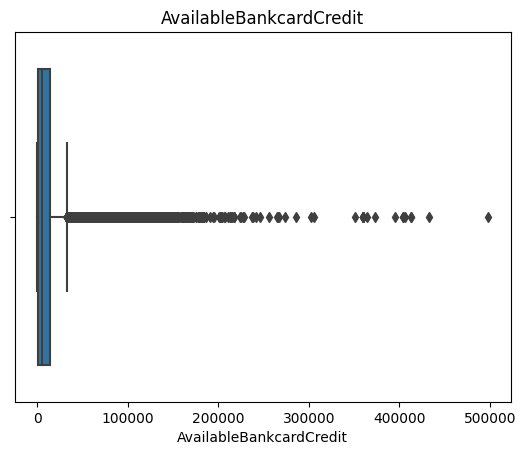

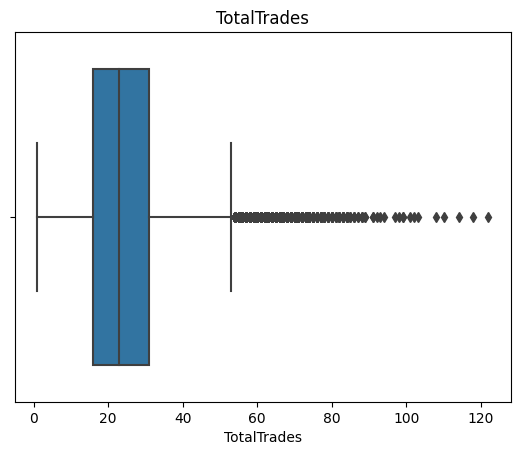

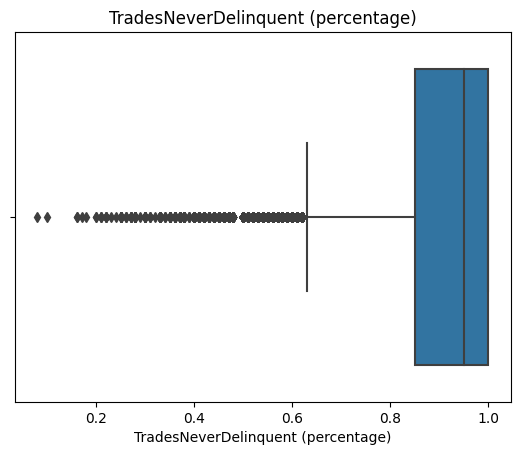

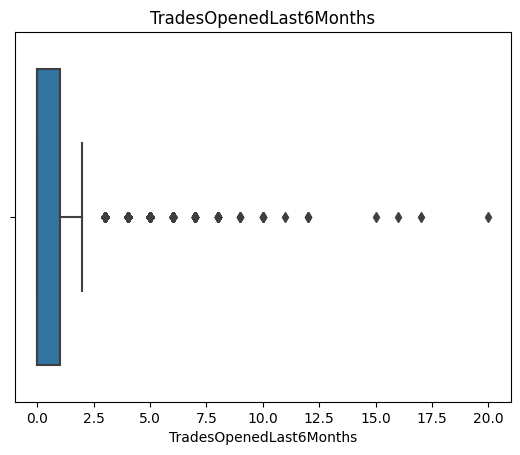

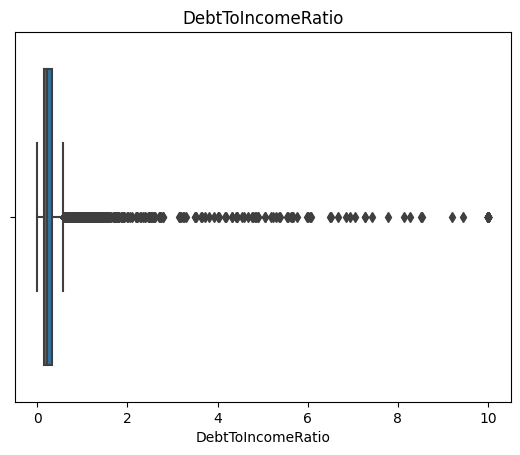

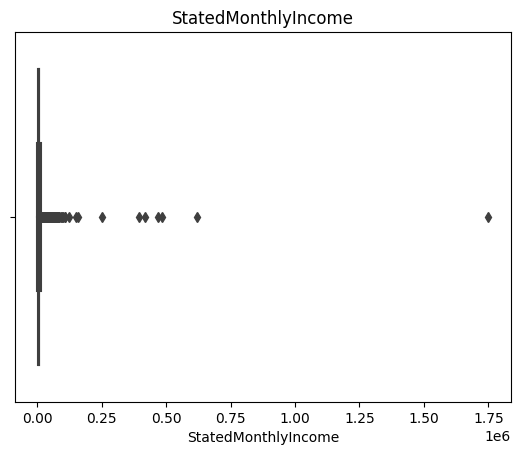

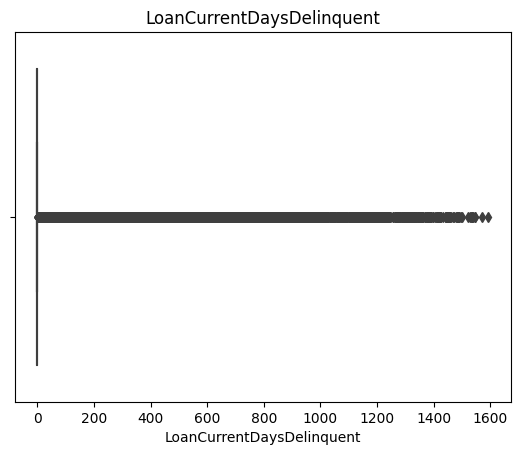

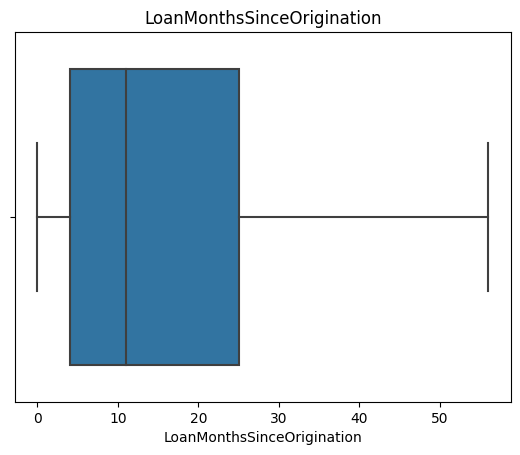

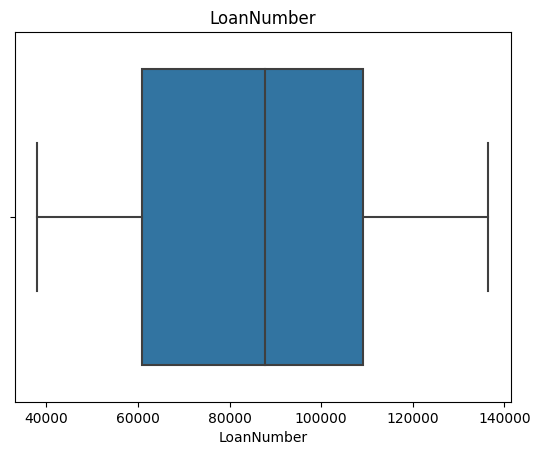

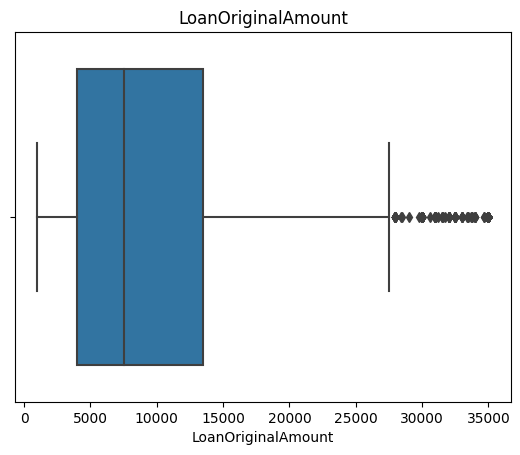

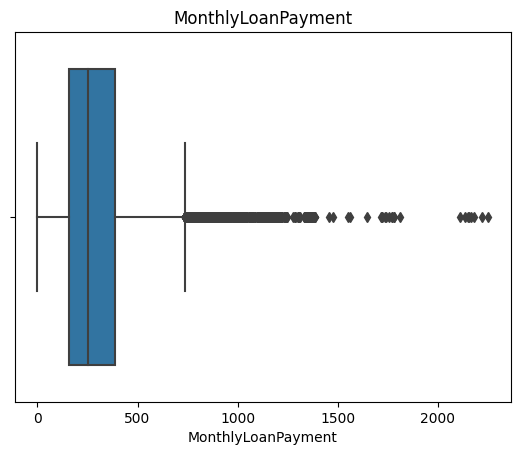

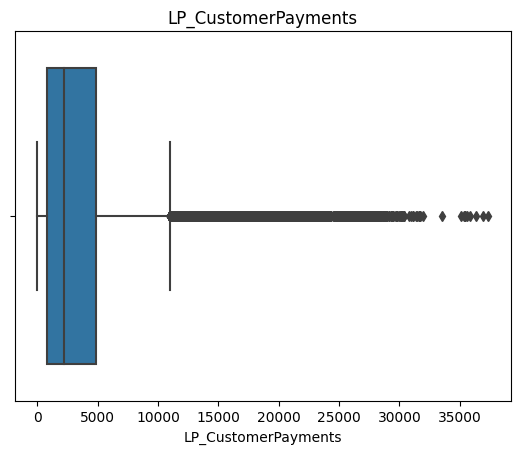

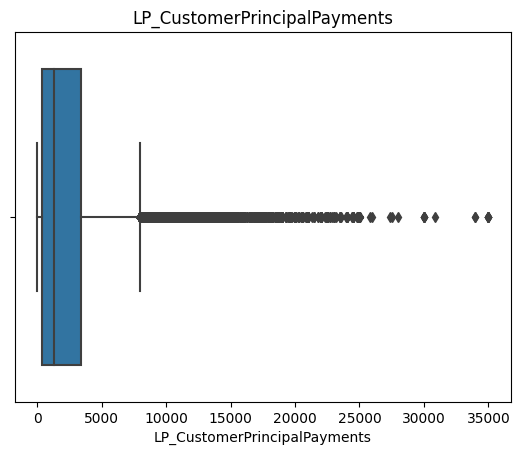

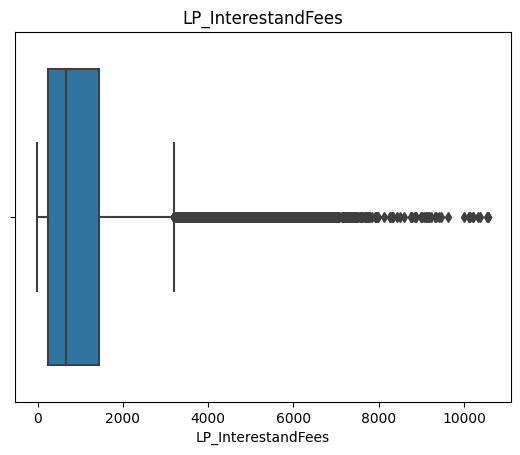

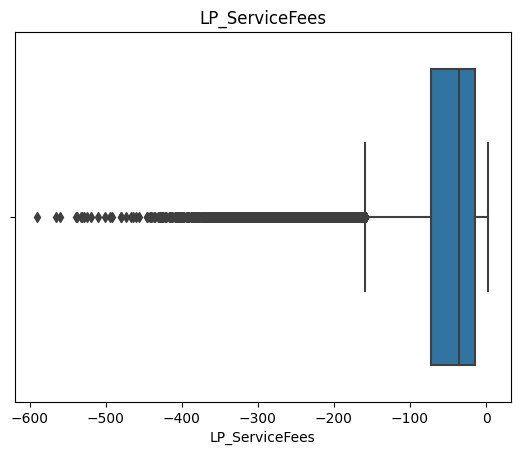

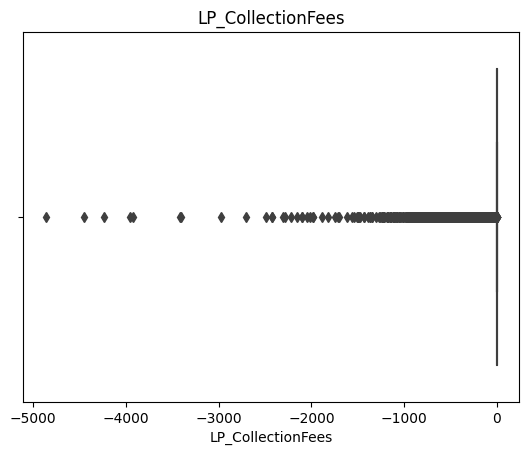

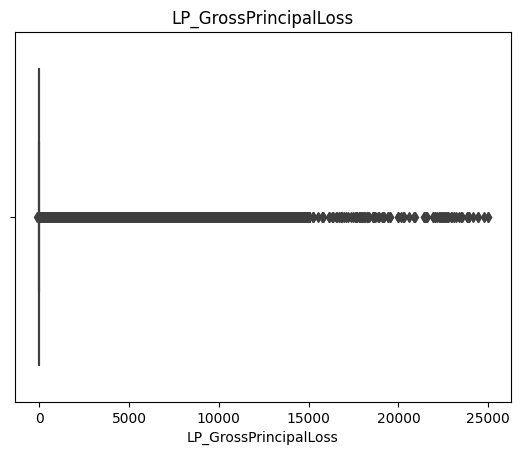

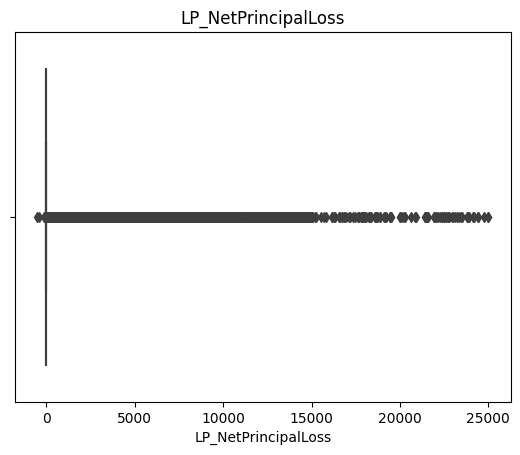

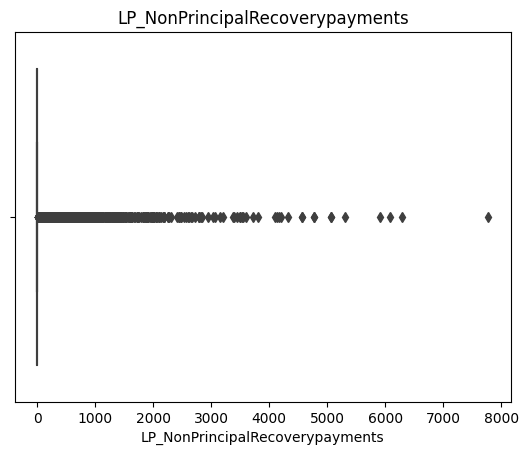

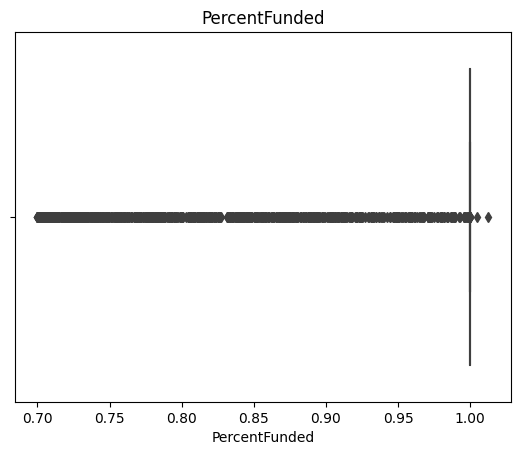

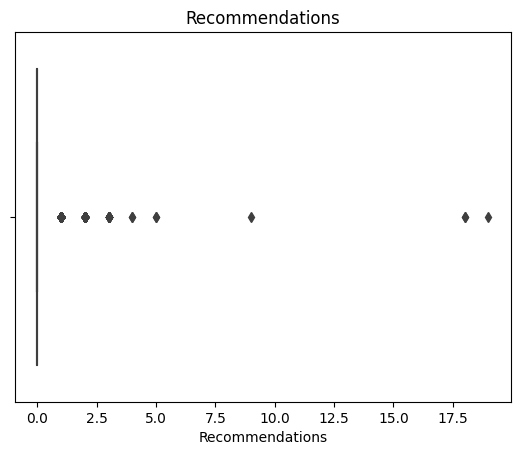

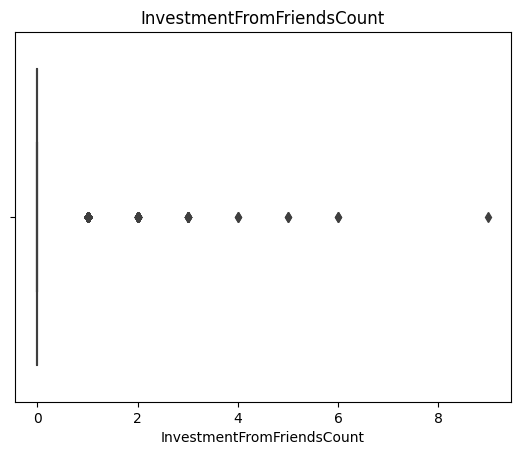

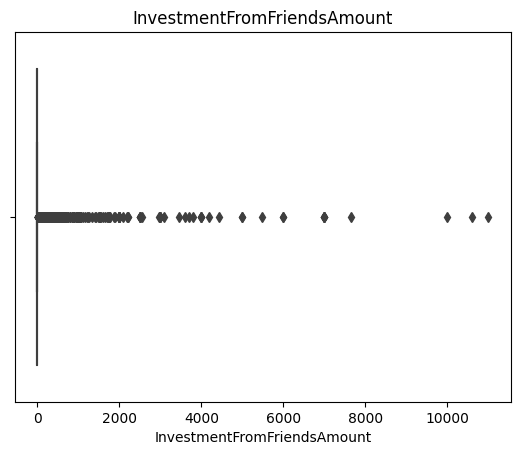

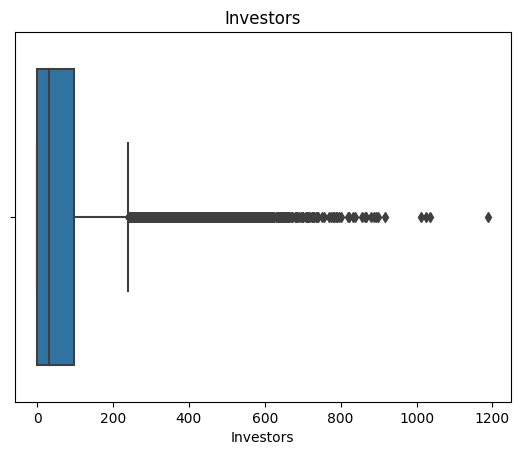

In [53]:
# Visualize the distribution of numerical columns

numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [54]:
# Identify outliers using z-score

z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
threshold = 3  # Adjust the threshold as needed

In [55]:
# Create a DataFrame to store the indices of outliers

outlier_indices = pd.DataFrame()
for column in numerical_columns:
    outlier_indices = pd.concat([outlier_indices, z_scores[z_scores[column] > threshold][column]])

In [56]:
# Remove outliers from the dataset

df = df.drop(outlier_indices.index)

In [57]:
# Summary after handling outliers

summary = df.describe(include='all')
print(summary)

                     ListingKey  ListingNumber            ListingCreationDate  \
count                     57253   5.725300e+04                          57253   
unique                    56579            NaN                          56579   
top     17A93590655669644DB4C06            NaN  2013-10-02 17:20:16.550000000   
freq                          6            NaN                              6   
mean                        NaN   8.052153e+05                            NaN   
std                         NaN   2.360050e+05                            NaN   
min                         NaN   4.162750e+05                            NaN   
25%                         NaN   5.860020e+05                            NaN   
50%                         NaN   8.006390e+05                            NaN   
75%                         NaN   1.012195e+06                            NaN   
max                         NaN   1.255149e+06                            NaN   

       CreditGrade         

Scaling the dataset

In [58]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[float, int]).columns

In [59]:
# Scale numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [60]:
# Print the scaled numerical columns
print(df[numerical_columns])

        ListingNumber      Term  BorrowerAPR  BorrowerRate  LenderYield  \
1            1.713673 -0.562715    -1.317050     -1.375568    -1.375520   
4            0.441727 -0.562715     0.312294      0.238781     0.238830   
6           -0.230151 -0.562715     1.142356      1.107620     1.107669   
12           1.171124 -0.562715    -0.547128     -0.661928    -0.661880   
13           0.150866 -0.562715    -1.171938     -1.217597    -1.217549   
...               ...       ...          ...           ...          ...   
113931       1.424036  1.515005    -0.929049     -0.885027    -0.884979   
113932      -0.220880 -0.562715     0.020000     -0.067460    -0.067412   
113933      -1.135576 -0.562715    -1.161332     -1.112283    -1.112235   
113934       1.118472  1.515005     0.230814      0.328852     0.328901   
113936       1.418956 -0.562715    -1.165342     -1.210668    -1.210621   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
1                     -1.316482 

In [61]:
# Calculate mean and standard deviation for each column

statistics = df[numerical_columns].describe().loc[['mean', 'std']]

In [62]:
# Print mean and standard deviation

print(statistics)

      ListingNumber          Term   BorrowerAPR  BorrowerRate   LenderYield  \
mean  -1.638196e-16  1.087167e-16  5.832971e-16  2.407652e-16  1.241058e-17   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   

      EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
mean            -2.084977e-17  -4.649002e-16     4.542271e-16   
std              1.000009e+00   1.000009e+00     1.000009e+00   

      ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
mean            -8.612940e-17 -1.515952e-16  ...   -1.176523e-16   
std              1.000009e+00  1.000009e+00  ...    1.000009e+00   

      LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
mean       2.482115e-18           5.808150e-17        -4.467808e-17   
std        1.000009e+00           1.000009e+00         1.000009e+00   

      LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
mean                     3.971384e-18   2.382657e-14              0.0   
s

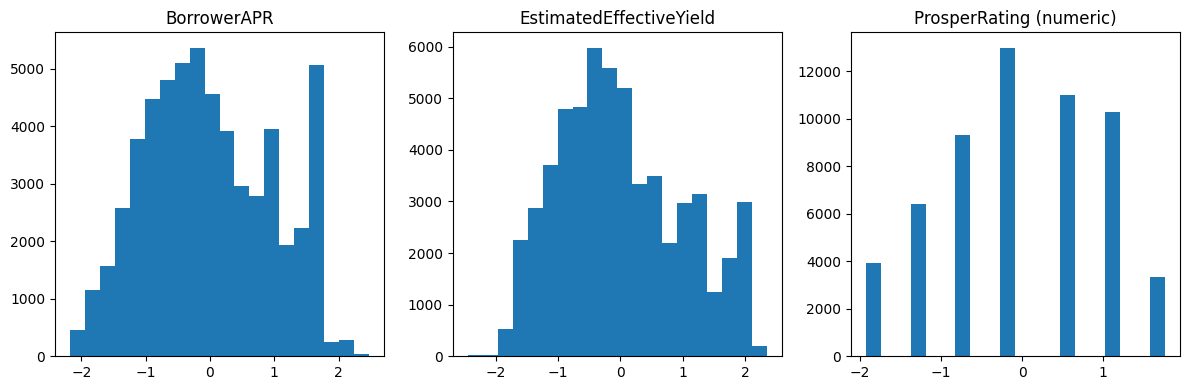

In [63]:
# Select a few columns for visualization
selected_columns = ['BorrowerAPR', 'EstimatedEffectiveYield', 'ProsperRating (numeric)']

# Plot histograms for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(12, 4))

for i, column in enumerate(selected_columns):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

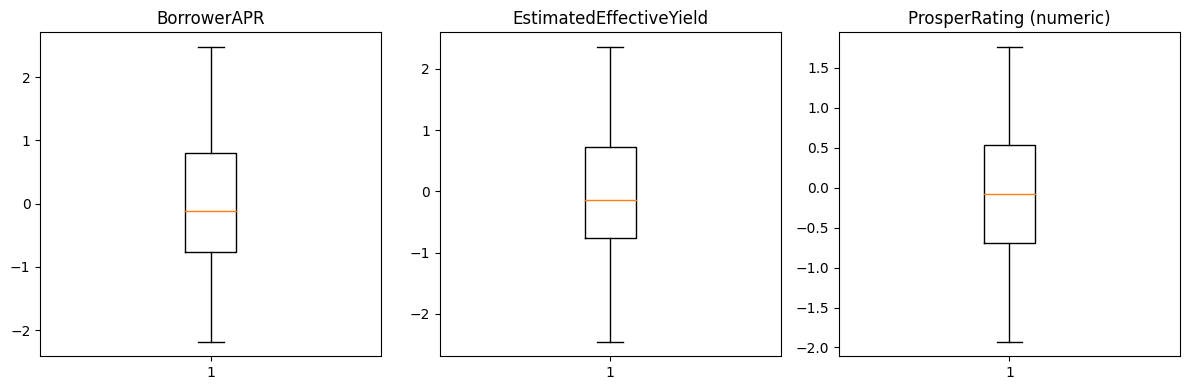

In [64]:
# Plot boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(12, 4))

for i, column in enumerate(selected_columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [65]:
non_numerical_columns = df.select_dtypes(exclude='number').columns

print("Non-numerical columns:")
print(non_numerical_columns)

Non-numerical columns:
Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')


In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns for encoding
categorical_columns = df.select_dtypes(include='category').columns

In [67]:
# Method 1: Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

In [68]:
# Method 2: One-Hot Encoding
onehot_encoders = []
for column in categorical_columns:
    onehot_encoder = OneHotEncoder(drop='first')
    encoded_column = onehot_encoder.fit_transform(df[column].values.reshape(-1, 1))
    df.drop(column, axis=1, inplace=True)
    encoded_df = pd.DataFrame(encoded_column.toarray(), columns=[f'{column}_{i}' for i in range(encoded_column.shape[1])])
    df = pd.concat([df, encoded_df], axis=1)
    onehot_encoders.append((column, onehot_encoder))

In [69]:
# Check if encoding has been applied (all columns should be numerical)
if len(df.select_dtypes(exclude='number').columns) == 0:
    print("Data Encoding Successful: All columns are numerical after encoding.")
else:
    print("Data Encoding Unsuccessful: There are still non-numerical columns.")

Data Encoding Unsuccessful: There are still non-numerical columns.


In [70]:
# LoanStatus: Convert to numerical values using label encoding

label_encoder = LabelEncoder()
df['LoanStatus'] = label_encoder.fit_transform(df['LoanStatus'])

In [71]:
# ProsperRating (Alpha): Convert to numerical values using label encoding

df['ProsperRating'] = label_encoder.fit_transform(df['ProsperRating (Alpha)'])

In [72]:
# Occupation: Apply label encoding

df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [73]:
# EmploymentStatus: Apply one-hot encoding

encoded_employment = pd.get_dummies(df['EmploymentStatus'], prefix='Employment')
df = pd.concat([df, encoded_employment], axis=1).drop(['EmploymentStatus'], axis=1)

In [74]:
# BorrowerState: Apply one-hot encoding

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_states = pd.DataFrame(onehot_encoder.fit_transform(df[['BorrowerState']]))
encoded_states.columns = onehot_encoder.get_feature_names_out(['BorrowerState'])
df = pd.concat([df, encoded_states], axis=1).drop(['BorrowerState'], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
# Occupation: Apply label encoding

df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [76]:
# IsBorrowerHomeowner, CurrentlyInGroup, IncomeVerifiable: Map 'True' to 1 and 'False' to 0

df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].fillna(False).astype(int)
df['CurrentlyInGroup'] = df['CurrentlyInGroup'].fillna(False).astype(int)
df['IncomeVerifiable'] = df['IncomeVerifiable'].fillna(False).astype(int)

In [77]:
# DateCreditPulled: Extract relevant features

df['DateCreditPulledYear'] = pd.to_datetime(df['DateCreditPulled']).dt.year
df['DateCreditPulledMonth'] = pd.to_datetime(df['DateCreditPulled']).dt.month
df = df.drop('DateCreditPulled', axis=1)

In [78]:
# FirstRecordedCreditLine: Extract relevant features

df['FirstRecordedCreditLineYear'] = pd.to_datetime(df['FirstRecordedCreditLine']).dt.year
df['FirstRecordedCreditLineMonth'] = pd.to_datetime(df['FirstRecordedCreditLine']).dt.month
df = df.drop('FirstRecordedCreditLine', axis=1)

In [79]:
# IncomeRange: Convert to numerical values using label encoding

df['IncomeRange'] = label_encoder.fit_transform(df['IncomeRange'].astype(str))

In [80]:
# LoanOriginationQuarter: Apply one-hot encoding

encoded_quarters = pd.get_dummies(df['LoanOriginationQuarter'], prefix='Quarter')
df = pd.concat([df, encoded_quarters], axis=1).drop(['LoanOriginationQuarter'], axis=1)

In [81]:
# ProsperRating (Alpha): Apply label encoding
le = LabelEncoder()
df['ProsperRating (Alpha)'] = le.fit_transform(df['ProsperRating (Alpha)'])

In [82]:
# Check if encoding was successful
non_numerical_columns = df.select_dtypes(include=['object']).columns

if non_numerical_columns.empty:
    print("Data Encoding Successful: All columns are numerical.")
else:
    print("Data Encoding Unsuccessful: There are still non-numerical columns.")
    print("Non-numerical columns:")
    print(non_numerical_columns)


Data Encoding Unsuccessful: There are still non-numerical columns.
Non-numerical columns:
Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanKey',
       'LoanOriginationDate', 'MemberKey'],
      dtype='object')


In [83]:
# Display the updated DataFrame
df

ListingKey  ListingNumber            ListingCreationDate  \
1      10273602499503308B223C1       1.713673  2014-02-27 08:28:07.900000000   
4      0F023589499656230C5E3E2       0.441727  2013-09-14 18:38:39.097000000   
6      0F0A3576754255009D63151      -0.230151  2013-04-12 09:52:56.147000000   
12     0F1A3597143888805163EF7       1.171124  2013-12-15 20:01:10.757000000   
13     0F1C3583260311305D68F87       0.150866  2013-07-15 16:28:28.087000000   
...                        ...            ...                            ...   
57238                      NaN            NaN                            NaN   
57241                      NaN            NaN                            NaN   
57242                      NaN            NaN                            NaN   
57243                      NaN            NaN                            NaN   
57246                      NaN            NaN                            NaN   

      CreditGrade      Term  LoanStatus  BorrowerAPR  BorrowerRate  \
1               C -0.562715         2.0    -1.317050     -1.375568   
4               C -0.562715         2.0     0.312294      0.238781   
6               C -0.562715         2.0     1.142356      1.107620   
12              C -0.562715         5.0    -0.547128     -0.661928   
13              C -0.562715         2.0    -1.171938     -1.217597   
...           ...       ...         ...          ...           ...   
57238         NaN       NaN         NaN          NaN           NaN   
57241         NaN       NaN         NaN          NaN           NaN   
57242         NaN       NaN         NaN          NaN           NaN   
57243         NaN       NaN         NaN          NaN           NaN   
57246         NaN       NaN         NaN          NaN           NaN   

       LenderYield  EstimatedEffectiveYield  ...  Quarter_Q3 2009  \
1        -1.375520                -1.316482  ...                0   
4         0.238830                 0.266669  ...                0   
6         1.107669                 1.108080  ...                0   
12       -0.661880                -0.601037  ...                0   
13       -1.217549                -1.149851  ...                0   
...            ...                      ...  ...              ...   
57238          NaN                      NaN  ...                0   
57241          NaN                      NaN  ...                0   
57242          NaN                      NaN  ...                0   
57243          NaN                      NaN  ...                0   
57246          NaN                      NaN  ...                0   

       Quarter_Q3 2010  Quarter_Q3 2011  Quarter_Q3 2012  Quarter_Q3 2013  \
1                    0                0                0                0   
4                    0                0                0                1   
6                    0                0                0                0   
12                   0                0                0                0   
13                   0                0                0                1   
...                ...              ...              ...              ...   
57238                0                0                0                0   
57241                0                0                0                0   
57242                0                0                0                0   
57243                0                0                0                0   
57246                0                0                0                0   

       Quarter_Q4 2009  Quarter_Q4 2010  Quarter_Q4 2011  Quarter_Q4 2012  \
1                    0                0                0                0   
4                    0                0                0                0   
6                    0                0                0                0   
12                   0                0                0                0   
13                   0                0                0                0   
..

In [84]:
# Save the cleaned dataset

df.to_csv("cleaned_dataset.csv", index=False)

In [85]:
# Define the rules for labeling
def label_loan(row):
    if row['ProsperScore'] <= 4:
        return 'High Risk'
    elif row['CreditScoreRangeLower'] < 600:
        return 'High Risk'
    elif row['DebtToIncomeRatio'] > 0.4:
        return 'High Risk'
    elif row['StatedMonthlyIncome'] < 2000:
        return 'High Risk'
    elif row['LoanStatus'] == 'Defaulted':
        return 'Defaulted'
    elif row['LoanStatus'] == 'Chargedoff':
        return 'Charged Off'
    else:
        return 'Low Risk'

# Select the required columns
selected_columns = ['ProsperScore', 'CreditScoreRangeLower', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanStatus']

# Apply the labeling function to each row in the selected columns
df['label'] = df[selected_columns].apply(label_loan, axis=1)

# Print the labeled dataset
print(df)

                    ListingKey  ListingNumber            ListingCreationDate  \
1      10273602499503308B223C1       1.713673  2014-02-27 08:28:07.900000000   
4      0F023589499656230C5E3E2       0.441727  2013-09-14 18:38:39.097000000   
6      0F0A3576754255009D63151      -0.230151  2013-04-12 09:52:56.147000000   
12     0F1A3597143888805163EF7       1.171124  2013-12-15 20:01:10.757000000   
13     0F1C3583260311305D68F87       0.150866  2013-07-15 16:28:28.087000000   
...                        ...            ...                            ...   
57238                      NaN            NaN                            NaN   
57241                      NaN            NaN                            NaN   
57242                      NaN            NaN                            NaN   
57243                      NaN            NaN                            NaN   
57246                      NaN            NaN                            NaN   

      CreditGrade      Term  LoanStatus

In [86]:
df.isnull().sum()

ListingKey             28474
ListingNumber          28474
ListingCreationDate    28474
CreditGrade            28474
Term                   28474
                       ...  
Quarter_Q4 2010            0
Quarter_Q4 2011            0
Quarter_Q4 2012            0
Quarter_Q4 2013            0
label                      0
Length: 144, dtype: int64

In [87]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
1   10273602499503308B223C1       1.713673  2014-02-27 08:28:07.900000000   
4   0F023589499656230C5E3E2       0.441727  2013-09-14 18:38:39.097000000   
6   0F0A3576754255009D63151      -0.230151  2013-04-12 09:52:56.147000000   
12  0F1A3597143888805163EF7       1.171124  2013-12-15 20:01:10.757000000   
13  0F1C3583260311305D68F87       0.150866  2013-07-15 16:28:28.087000000   

   CreditGrade      Term  LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
1            C -0.562715         2.0    -1.317050     -1.375568    -1.375520   
4            C -0.562715         2.0     0.312294      0.238781     0.238830   
6            C -0.562715         2.0     1.142356      1.107620     1.107669   
12           C -0.562715         5.0    -0.547128     -0.661928    -0.661880   
13           C -0.562715         2.0    -1.171938     -1.217597    -1.217549   

    EstimatedEffectiveYield  ...  Quarter_Q3 2010  Quarter_Q3 2011  \
1                 -1.316482  ...                0                0   
4                  0.266669  ...                0                0   
6                  1.108080  ...                0                0   
12                -0.601037  ...                0                0   
13                -1.149851  ...                0                0   

    Quarter_Q3 2012  Quarter_Q3 2013  Quarter_Q4 2009  Quarter_Q4 2010  \
1                 0                0                0                0   
4                 0                1                0                0   
6                 0                0                0                0   
12                0                0                0                0   
13                0                1                0                0   

    Quarter_Q4 2011  Quarter_Q4 2012  Quarter_Q4 2013      label  
1                 0                0                0  High Risk  
4                 0                0                0  High Risk  
6                 0                0                0  High Risk  
12                0                0                0  High Risk  
13                0                0                0  High Risk  

[5 rows x 144 columns]

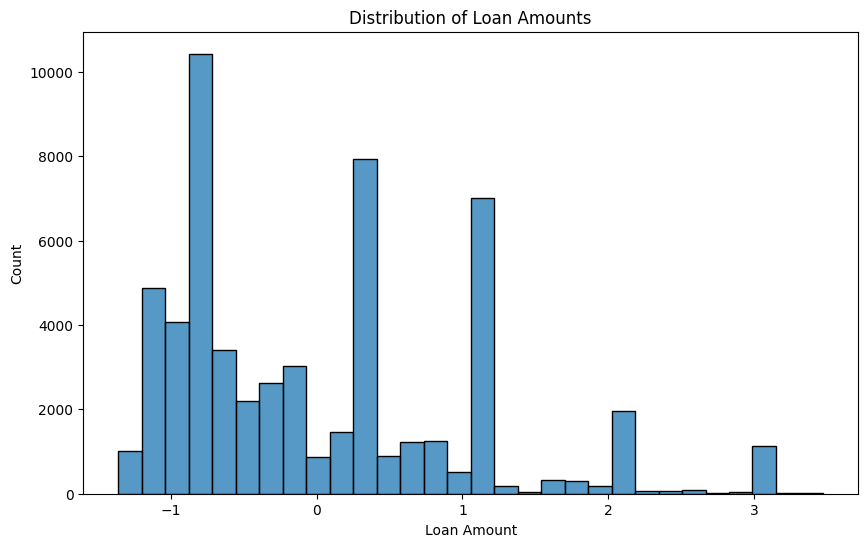

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LoanOriginalAmount', bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

In [89]:
import pandas as pd

# Define the labeling function
def label_function(row):
    # Determine the label based on the row data
    if row['LoanCurrentDaysDelinquent']: 
        label = 1
    else:
        label = 0
    return label

# Load the dataset into a pandas dataframe
df = pd.read_csv('/content/cleaned_dataset.csv')

# Apply the labeling function to each row using the apply function
df['Label'] = df.apply(label_function, axis=1)

<ipython-input-89-3df31b44731f>:13: DtypeWarning: Columns (0,2,3,44,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_dataset.csv')


In [90]:
# Perform data labeling
# Here, let's assume we want to label 'LoanStatus' based on a condition

def label_loan_status(row):
    if row['LoanCurrentDaysDelinquent'] > 180:
        return 0  # Delinquent
    else:
        return 1  # Not Delinquent

# Apply the labeling function to create a new column 'Label'
df['Label'] = df.apply(label_loan_status, axis=1)

# Print the labeled dataset
print(df)


                    ListingKey  ListingNumber            ListingCreationDate  \
0      10273602499503308B223C1       1.713673  2014-02-27 08:28:07.900000000   
1      0F023589499656230C5E3E2       0.441727  2013-09-14 18:38:39.097000000   
2      0F0A3576754255009D63151      -0.230151  2013-04-12 09:52:56.147000000   
3      0F1A3597143888805163EF7       1.171124  2013-12-15 20:01:10.757000000   
4      0F1C3583260311305D68F87       0.150866  2013-07-15 16:28:28.087000000   
...                        ...            ...                            ...   
85722                      NaN            NaN                            NaN   
85723                      NaN            NaN                            NaN   
85724                      NaN            NaN                            NaN   
85725                      NaN            NaN                            NaN   
85726                      NaN            NaN                            NaN   

      CreditGrade      Term  LoanStatus

In [91]:
# Fill missing values in float columns with mean
float_columns = df.select_dtypes(include='float').columns
df[float_columns] = df[float_columns].fillna(df[float_columns].mean())


In [92]:
# Verify if there are any remaining missing values
missing_values_count = df.isnull().sum().sum()
if missing_values_count == 0:
    print("All missing values have been filled.")
else:
    print("Some missing values remain. Please check and handle them.")

Some missing values remain. Please check and handle them.


univariate

In [93]:
variable = 'LoanOriginalAmount'

In [94]:
print(df[variable].describe())

count    8.572700e+04
mean    -5.467255e-17
std      8.172273e-01
min     -1.358082e+00
25%     -6.292833e-01
50%     -5.473064e-17
75%      2.817146e-01
max      3.470207e+00
Name: LoanOriginalAmount, dtype: float64


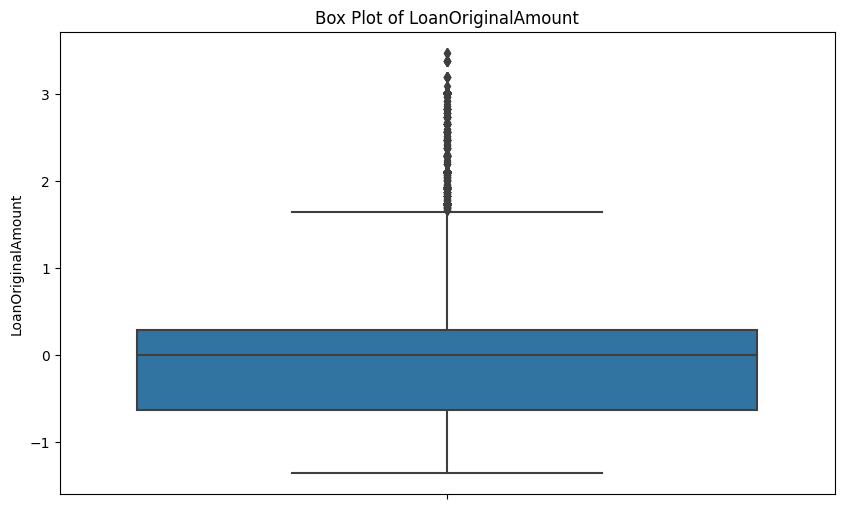

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=variable)
plt.title('Box Plot of ' + variable)
plt.ylabel(variable)
plt.show()

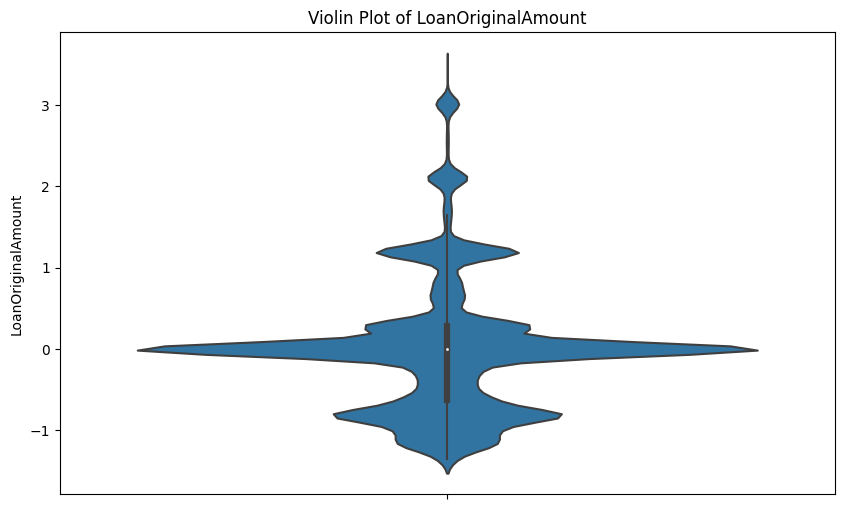

In [96]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y=variable)
plt.title('Violin Plot of ' + variable)
plt.ylabel(variable)
plt.show()

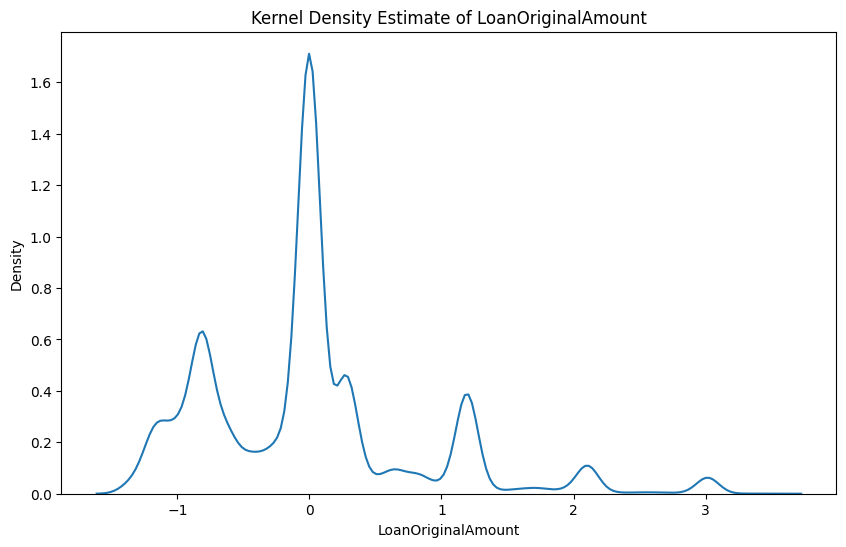

In [97]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=variable)
plt.title('Kernel Density Estimate of ' + variable)
plt.xlabel(variable)
plt.ylabel('Density')
plt.show()

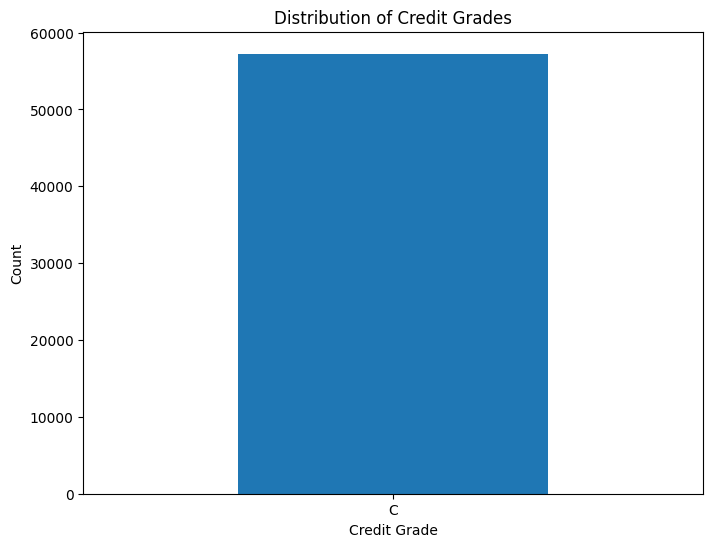

In [98]:
#Research Question 1: Distribution of Credit Grades:

import matplotlib.pyplot as plt

# Plotting the distribution of Credit Grades
plt.figure(figsize=(8, 6))
df['CreditGrade'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Credit Grades')
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


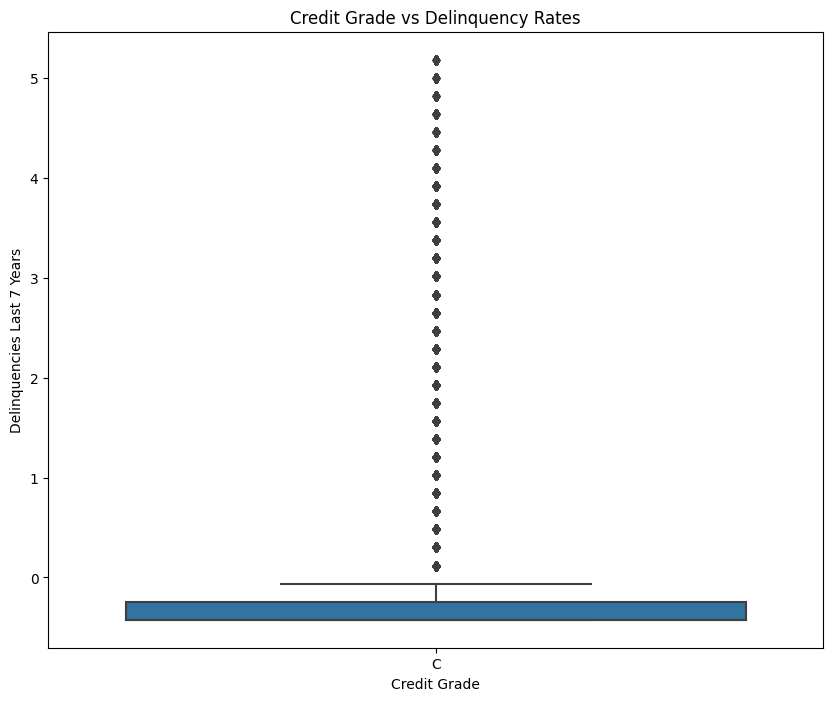

In [116]:
#Research Question 2: Relationship between Credit Grade and Delinquency Rates:

import seaborn as sns

# Creating a boxplot to compare Credit Grade and Delinquency Rates
plt.figure(figsize=(10, 8))
sns.boxplot(x='CreditGrade', y='DelinquenciesLast7Years', data=df)
plt.title('Credit Grade vs Delinquency Rates')
plt.xlabel('Credit Grade')
plt.ylabel('Delinquencies Last 7 Years')
plt.show()

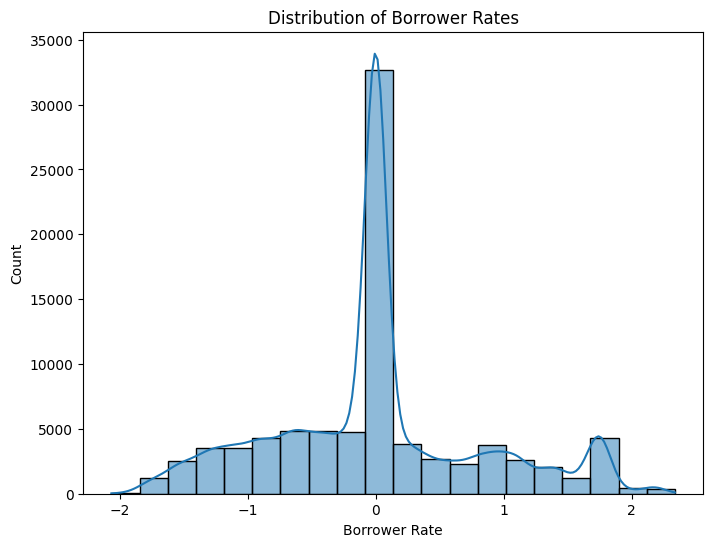

In [117]:
#Research Question 3: Distribution of Borrower Rates:

# Plotting the distribution of Borrower Rates
plt.figure(figsize=(8, 6))
sns.histplot(df['BorrowerRate'], bins=20, kde=True)
plt.title('Distribution of Borrower Rates')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.show()


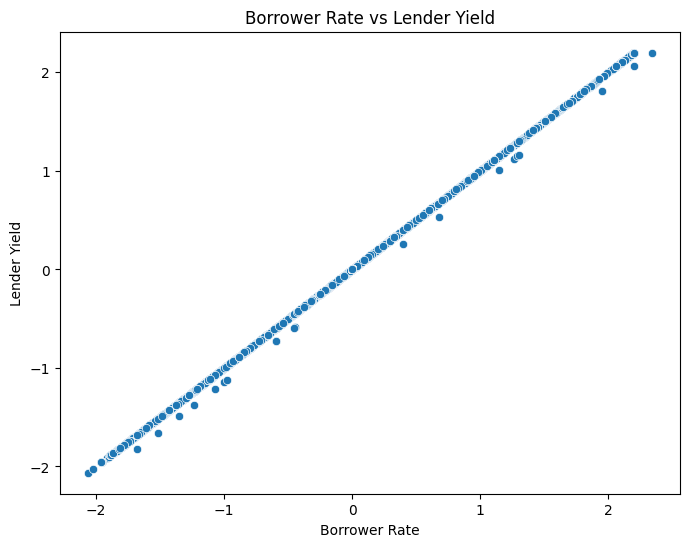

In [118]:
#Research Question 4: Relationship between Borrower Rate and Lender Yield:

# Scatter plot to visualize the relationship between Borrower Rate and Lender Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BorrowerRate', y='LenderYield', data=df)
plt.title('Borrower Rate vs Lender Yield')
plt.xlabel('Borrower Rate')
plt.ylabel('Lender Yield')
plt.show()


bivariate

In [100]:
variable1 = 'LoanOriginalAmount'
variable2 = 'BorrowerRate'

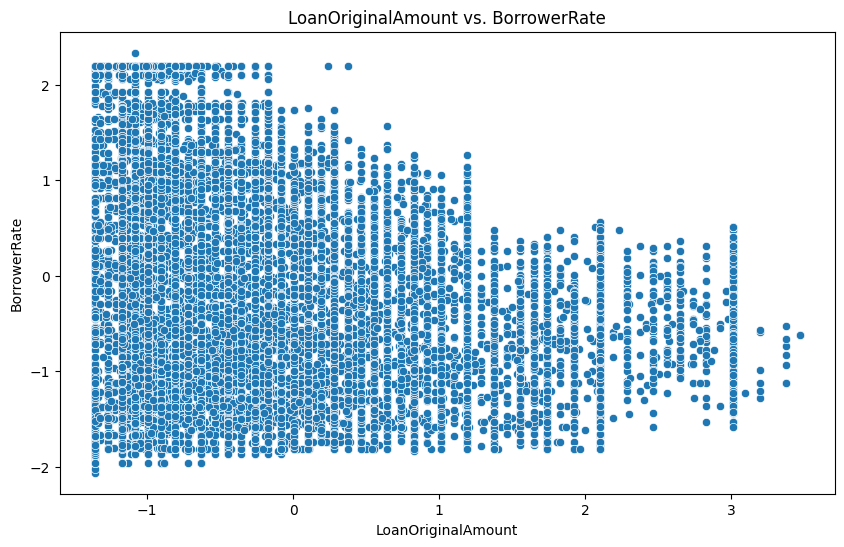

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=variable1, y=variable2)
plt.title(variable1 + ' vs. ' + variable2)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

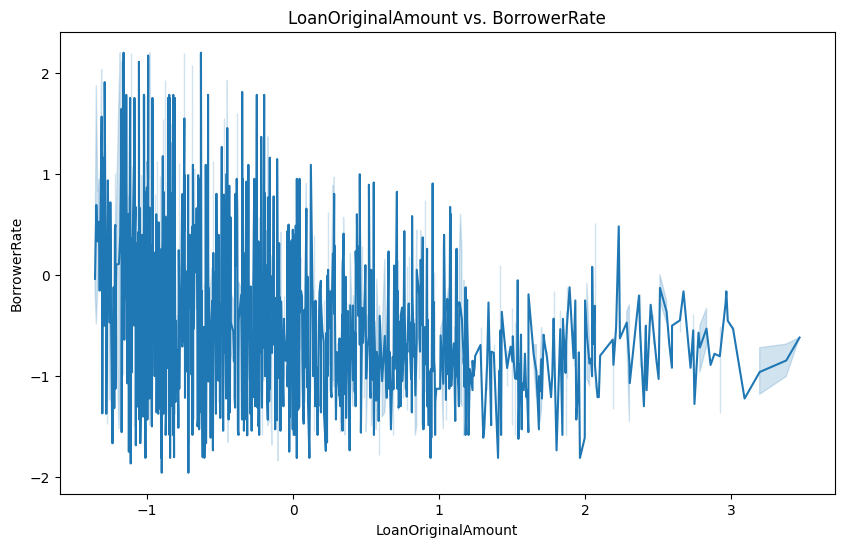

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=variable1, y=variable2)
plt.title(variable1 + ' vs. ' + variable2)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

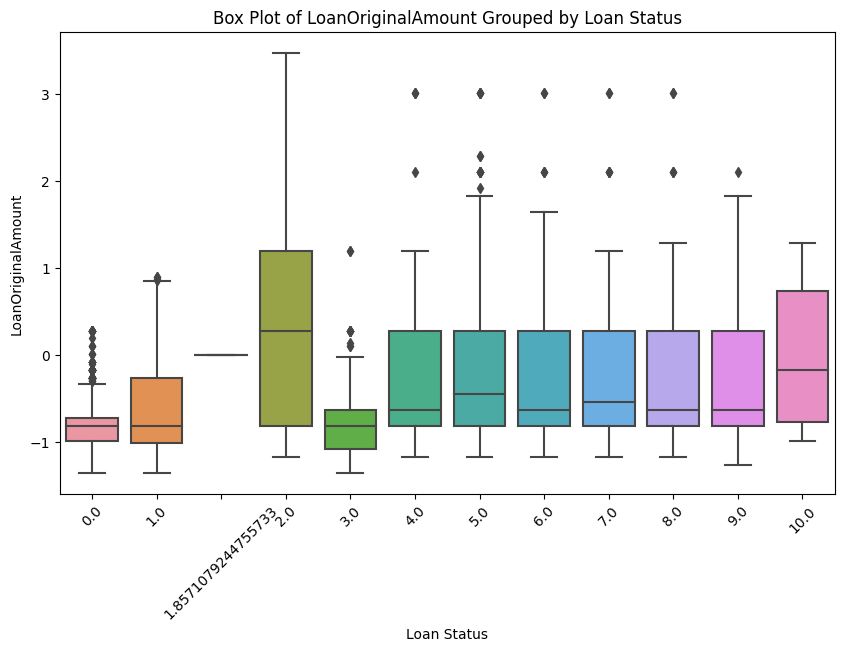

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LoanStatus', y=variable1)
plt.title('Box Plot of ' + variable1 + ' Grouped by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel(variable1)
plt.xticks(rotation=45)
plt.show()

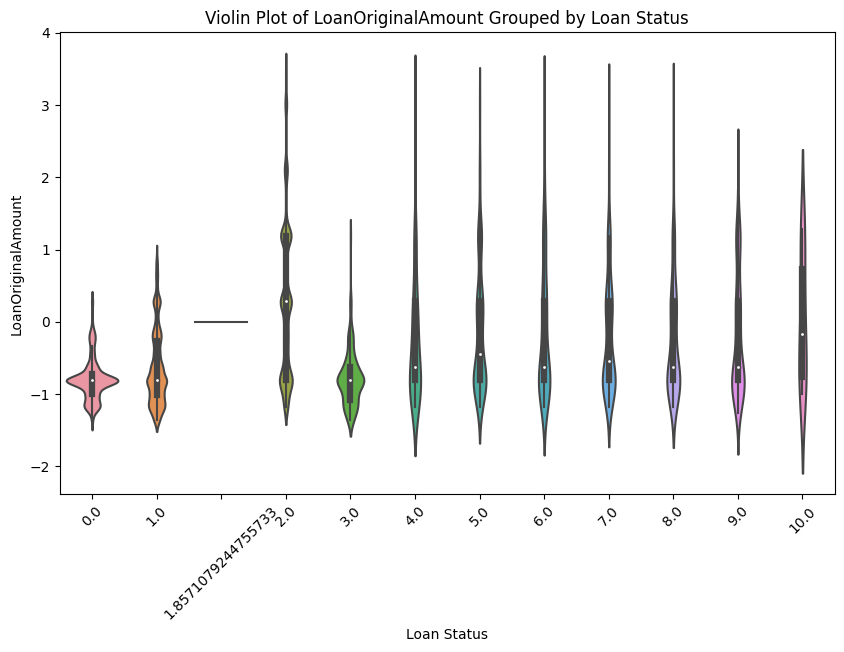

In [104]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='LoanStatus', y=variable1)
plt.title('Violin Plot of ' + variable1 + ' Grouped by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel(variable1)
plt.xticks(rotation=45)
plt.show()

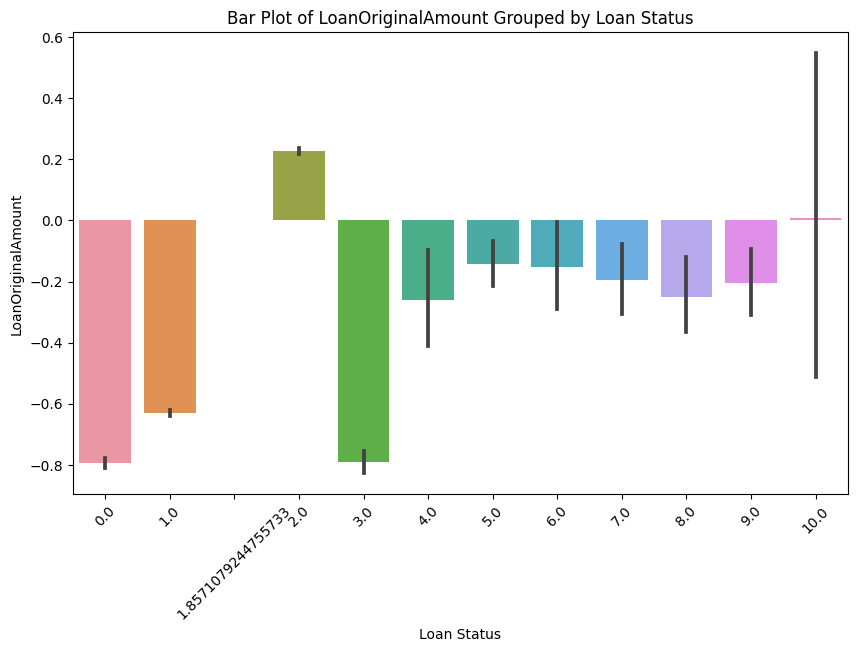

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='LoanStatus', y=variable1)
plt.title('Bar Plot of ' + variable1 + ' Grouped by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel(variable1)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

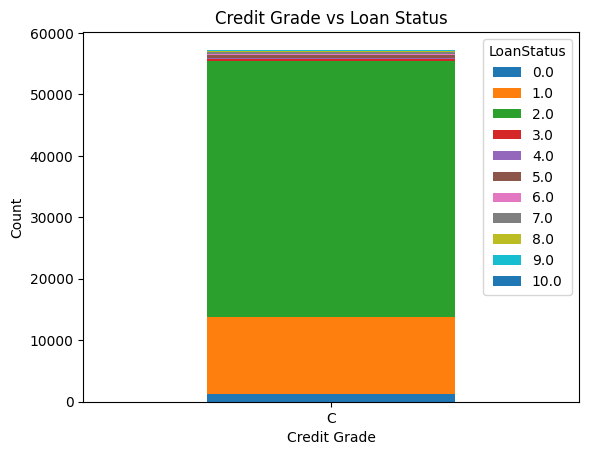

In [121]:
#Research Question 6: Relationship between Credit Grade and Loan Status:

# Creating a stacked bar plot to visualize the relationship between Credit Grade and Loan Status
plt.figure(figsize=(10, 8))
pd.crosstab(df['CreditGrade'], df['LoanStatus']).plot(kind='bar', stacked=True)
plt.title('Credit Grade vs Loan Status')
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

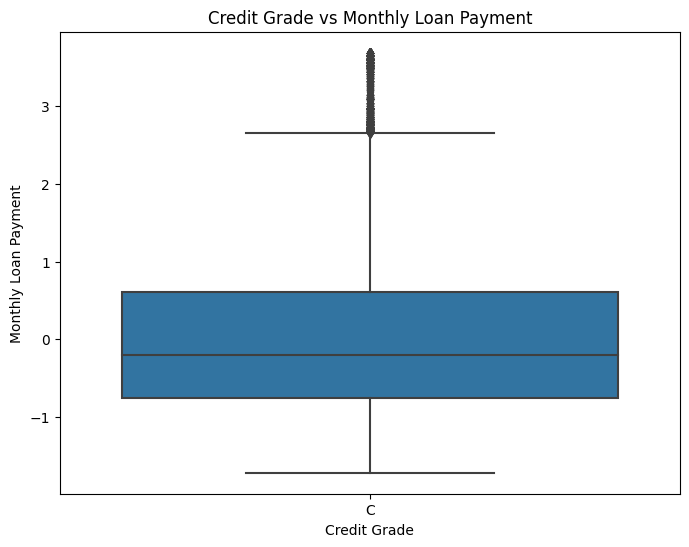

In [106]:
#Research Question 5: Relationship between Credit Grade and Monthly Loan Payment:

# Creating a boxplot to compare Credit Grade and Monthly Loan Payment
plt.figure(figsize=(8,6))
sns.boxplot(x='CreditGrade', y='MonthlyLoanPayment', data=df)
plt.title('Credit Grade vs Monthly Loan Payment')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Payment')
plt.show()

Multivariate

In [107]:
variable1 = 'LoanOriginalAmount'
variable2 = 'BorrowerRate'
variable3 = 'ProsperRating (Alpha)'

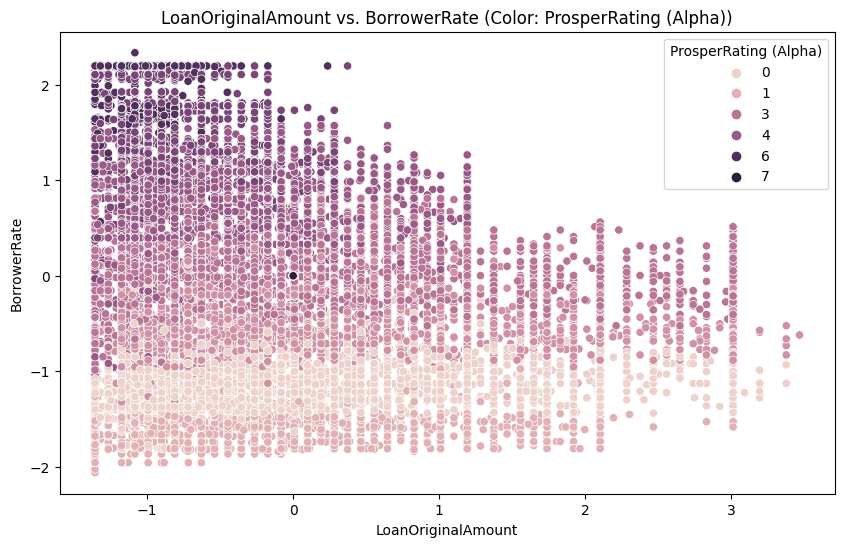

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=variable1, y=variable2, hue=variable3)
plt.title(variable1 + ' vs. ' + variable2 + ' (Color: ' + variable3 + ')')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

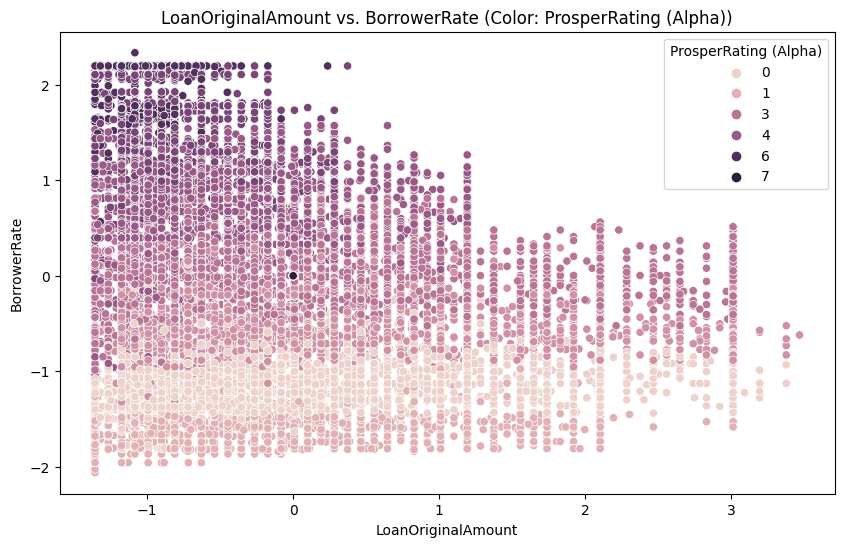

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=variable1, y=variable2, hue=variable3)
plt.title(variable1 + ' vs. ' + variable2 + ' (Color: ' + variable3 + ')')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

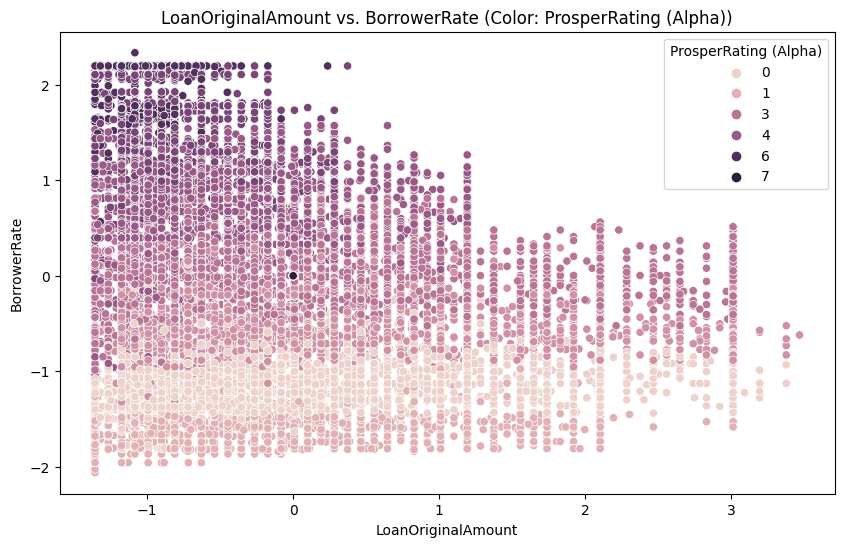

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=variable1, y=variable2, hue=variable3)
plt.title(variable1 + ' vs. ' + variable2 + ' (Color: ' + variable3 + ')')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

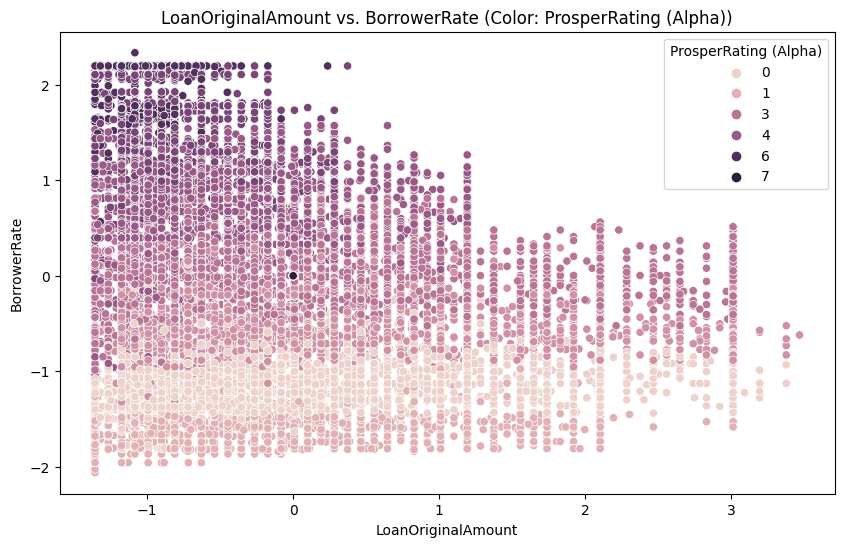

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=variable1, y=variable2, hue=variable3)
plt.title(variable1 + ' vs. ' + variable2 + ' (Color: ' + variable3 + ')')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

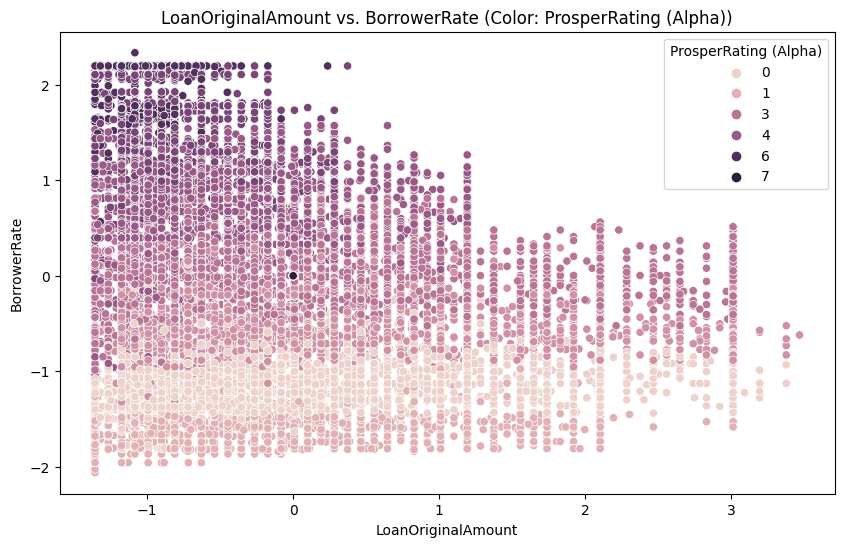

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=variable1, y=variable2, hue=variable3)
plt.title(variable1 + ' vs. ' + variable2 + ' (Color: ' + variable3 + ')')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

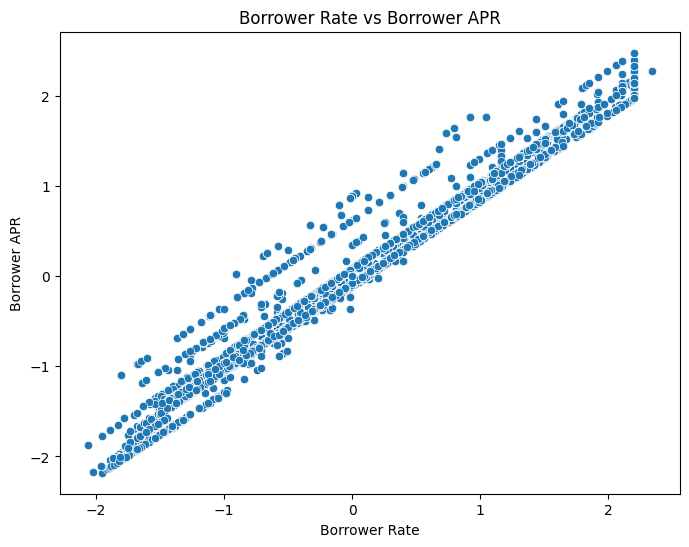

In [113]:
#Research Question 7: Relationship between Borrower Rate and Borrower APR:

# Scatter plot to visualize the relationship between Borrower Rate and Borrower APR
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BorrowerRate', y='BorrowerAPR', data=df)
plt.title('Borrower Rate vs Borrower APR')
plt.xlabel('Borrower Rate')
plt.ylabel('Borrower APR')
plt.show()